## k-means

Pour tenter de résoudre notre problématique de cluestering nous pouvons utiliser l'algorithme de cluestering k-means.
Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes (ou clusters). Il minimise la somme des variances intra-cluster.

In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [2]:
df = pd.read_csv('./RFM_sampling_dataset.csv')
df

,Recency,Monetary,Frequency
0,30.849488,1.441798,1
1,18.668384,1.578120,1
2,27.257928,1.480286,1
3,25.286900,1.818071,1
4,17.450627,1.261348,1
...,...,...,...
8595,22.464937,1.632985,7
8596,15.876432,1.268373,7
8597,17.450627,1.446195,7
8598,21.929574,1.712406,9


In [3]:
df_sample = df.copy()
df_sample.shape

(8600, 3)

In [5]:
X = df_sample.values
#y = df_sample['customer_unique_id'].values
print(X.shape)
#print(y.shape)

(8600, 3)


In [6]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(8600, 3)


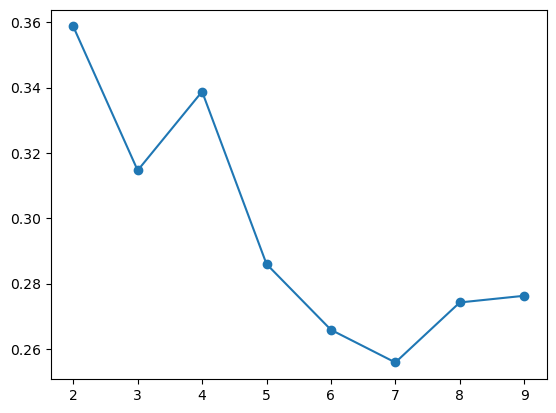

In [7]:
from sklearn import cluster, metrics

silhouettes = []
for num_clusters in range (2, 10): #on regarde de 2 à 10 clusters
    cls = cluster.KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')

In [9]:
from sklearn import decomposition

X = df.values
X_norm = preprocessing.scale(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.38913758 0.72598264]


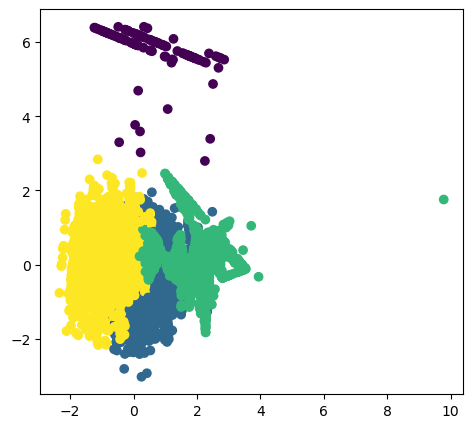

In [10]:
fig = plt.figure(figsize=(12, 5))

cls = cluster.KMeans(n_clusters=4)
cls.fit(X_norm)
ax = fig.add_subplot(121)#1 figure en ordonné, 2 figures en abscisse et on s'occupe de la première figure
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls.labels_)#on observe la première et la deuxième composante

Pour déterminer le nombre optimal de cluster à utiliser pour notre algorithme k-means nous utilisons la méthode du coude (Elbow Method), Elle consiste à observer la variation de l'inertie (somme des carrés des distances entre les points et les centroïdes) en fonction du nombre de clusters.

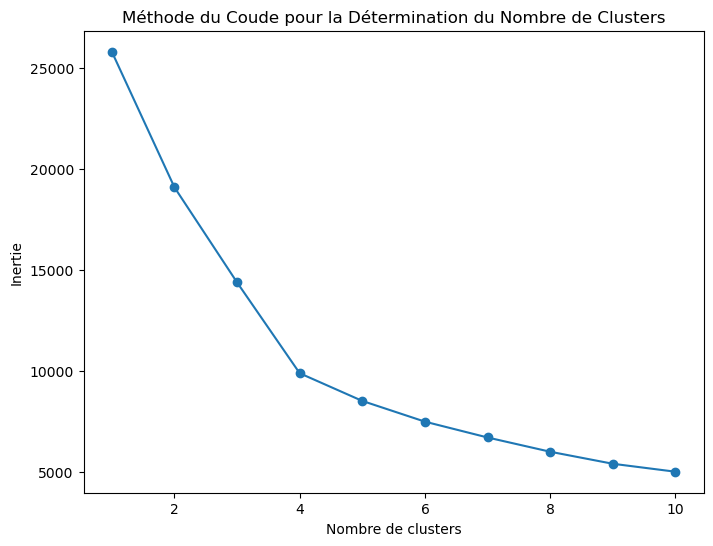

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_Y = df.values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_Y)

inertis = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertis.append(kmeans.inertia_)

# Tracé de la courbe de l'inertie
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertis, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour la Détermination du Nombre de Clusters')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_
df

,Recency,Monetary,Frequency,Cluster
0,30.849488,1.441798,1,2
1,18.668384,1.578120,1,3
2,27.257928,1.480286,1,2
3,25.286900,1.818071,1,2
4,17.450627,1.261348,1,3
...,...,...,...,...
8595,22.464937,1.632985,7,0
8596,15.876432,1.268373,7,0
8597,17.450627,1.446195,7,0
8598,21.929574,1.712406,9,0


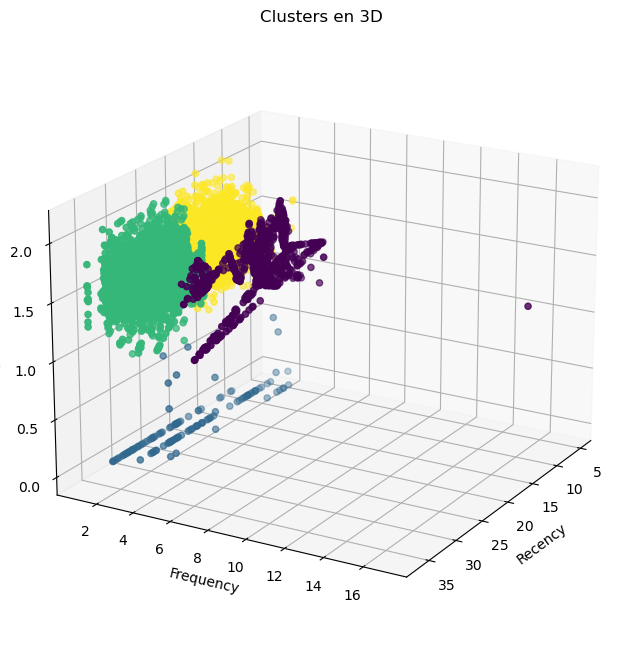

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=30, elev=20)

plt.title('Clusters en 3D')
plt.show()

Nous pouvons également utiliser le coefficient de distortion pour obtenir le k le plus adapté à notre modèle. Connu sous le nom d'inertie intra-classe, c'est une mesure qui évalue la compacité des clusters obtenus lors de l'application d'un algorithme de clustering comme K-means. Il mesure la somme des carrés des distances euclidiennes entre chaque point de données et le centroïde de son cluster associé.

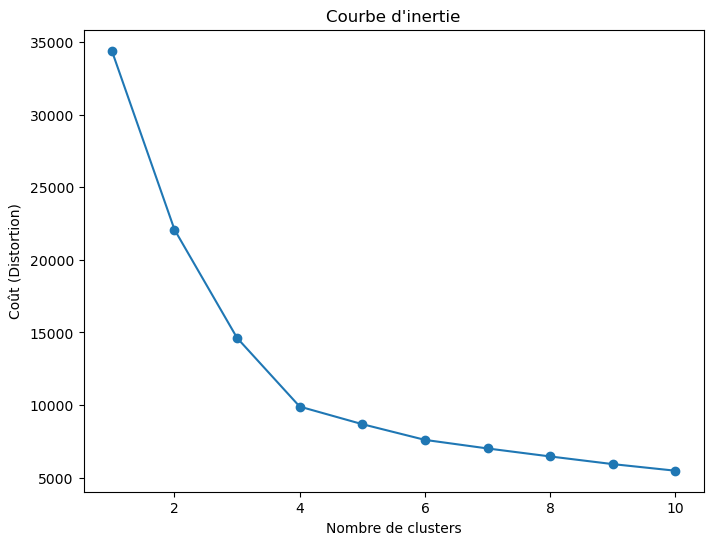

In [14]:
df_X = df.values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_X)

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût (Distortion)')
plt.title("Courbe d'inertie")
plt.show()